In [10]:
import fastbook
from fastbook import *
import torch
from fastai.vision import *
from PIL import Image

In [22]:
path = untar_data(URLs.MNIST_SAMPLE)
path.ls()

(#3) [Path('C:/Users/Bisrat worku/.fastai/data/mnist_sample/labels.csv'),Path('C:/Users/Bisrat worku/.fastai/data/mnist_sample/train'),Path('C:/Users/Bisrat worku/.fastai/data/mnist_sample/valid')]

In [20]:
three = (path/"train"/"3").ls()
seven = (path/"train"/"7").ls()
Image.open(three[0])

In [21]:
Image.open(seven[0])

In [25]:
val_three = (path/'valid'/'3').ls()
val_seven = (path/'valid'/'7').ls()
Image.open(val_seven[0])

In [28]:
ten_three = [tensor(Image.open(o))for o in three]
ten_seven = [tensor(Image.open(o))for o in seven]

(<Axes: >, <Axes: >)

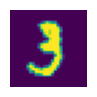

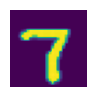

In [32]:
show_image(ten_three[0]),show_image(ten_seven[0])

In [33]:
ten_val_three = [tensor(Image.open(o))for o in val_three]
ten_val_seven = [tensor(Image.open(o))for o in val_seven]

In [39]:
stacked_three = torch.stack(ten_three).float()/255
stacked_seven = torch.stack(ten_seven).float()/255

<Axes: >

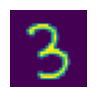

In [40]:
stacked_val_three = torch.stack(ten_val_three).float()/255
stacked_val_seven = torch.stack(ten_val_seven).float()/255
show_image(stacked_val_three[0])

In [43]:
train_x = torch.cat([stacked_three,stacked_seven]).view(-1,28*28)
train_y = tensor([1]*len(three)+[0]*len(seven)).unsqueeze(1)
train_x.shape,train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [45]:
train_dataset = list(zip(train_x,train_y))
x,y = train_dataset[0]
x.shape,y

(torch.Size([784]), tensor([1]))

In [47]:
valid_x = torch.cat([stacked_three,stacked_seven]).view(-1,28*28)
valid_y = tensor([1]*len(three) + [0] * len(seven)).unsqueeze(1)
valid_x.shape,valid_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [49]:
valid_dataset = list(zip(valid_x,valid_y))
x,y = valid_dataset[0]
x.shape,y                

(torch.Size([784]), tensor([1]))

In [55]:
def init_params(size,std=1):return (torch.randn(size)*std).float().requires_grad_()

In [56]:
def make_pred(img):return img @ weight + bias

In [57]:
def loss_func(pred,target):
    pred = pred.sigmoid()
    return torch.where(target == 1 , 1 - pred , pred).mean()

In [58]:
def calc_grad(img,target):
    pred = make_pred(img)
    loss = loss_func(pred,target)
    loss.backward()

In [65]:
train_dl = DataLoader(train_dataset,batch_size = 250, shuffle = True)
valid_dl = DataLoader(valid_dataset,batch_size = 250,shuffle = True)
s = list(train_dl)
len(s)

50

In [80]:
weight = init_params((28*28,1))
bias = init_params(1)
params = weight,bias
lr = 1

In [81]:
def train_epoch(lr,params):
    for x,y in train_dl:
        calc_grad(x,y)
        for p in params:
            p.data -= p.grad.data * lr
            p.grad.zero_()

In [70]:
def validate(img,label):
    pred = make_pred(img).sigmoid()
    correct = (pred > 0.5) == label
    return correct.float().mean()

In [87]:
def valid_epoch():
    accurate = torch.stack([validate(x,y)for x,y in valid_dl])
    return accurate.float().mean()

In [88]:
for i in range(20):
    train_epoch(lr,params)
    print(f'accuracy {valid_epoch()}')

accuracy 0.9679551124572754
accuracy 0.9700919985771179
accuracy 0.9716810584068298
accuracy 0.9735090732574463
accuracy 0.9744921326637268
accuracy 0.9753950238227844
accuracy 0.9768230319023132
accuracy 0.9773260354995728
accuracy 0.9783890247344971
accuracy 0.9788919687271118
accuracy 0.9791780710220337
accuracy 0.9795429706573486
accuracy 0.9798861145973206
accuracy 0.9800921082496643
accuracy 0.9805030822753906
accuracy 0.9804460406303406
accuracy 0.9806060791015625
accuracy 0.9810861349105835
accuracy 0.981109082698822
accuracy 0.9813260436058044
